In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm

In [2]:
ameo_data= pd.read_csv("sheet1.csv")
df = ameo_data.copy()


In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [7]:
df['Unnamed: 0'].nunique()

1

## Dropping the column

In [8]:
df = df.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'] )


In [9]:
df.shape

(3998, 35)

In [10]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


## Fixing the column dtypes

In [11]:
df["Salary"]= df["Salary"].astype('int64')

In [12]:
df['DOL'].unique()

array(['present', '3/1/15 0:00', '5/1/15 0:00', '7/1/15 0:00',
       '4/1/15 0:00', '10/1/14 0:00', '9/1/14 0:00', '6/1/14 0:00',
       '9/1/12 0:00', '12/1/13 0:00', '6/1/15 0:00', '10/1/13 0:00',
       '1/1/15 0:00', '4/1/14 0:00', '6/1/13 0:00', '3/1/12 0:00',
       '7/1/14 0:00', '2/1/13 0:00', '1/1/14 0:00', '4/1/13 0:00',
       '7/1/12 0:00', '5/1/14 0:00', '9/1/13 0:00', '2/1/15 0:00',
       '1/1/12 0:00', '8/1/15 0:00', '8/1/14 0:00', '12/1/15 0:00',
       '12/1/14 0:00', '5/1/12 0:00', '3/1/11 0:00', '7/1/11 0:00',
       '2/1/14 0:00', '12/1/11 0:00', '10/1/15 0:00', '11/1/14 0:00',
       '3/1/14 0:00', '11/1/11 0:00', '5/1/13 0:00', '7/1/13 0:00',
       '11/1/13 0:00', '1/1/11 0:00', '5/1/11 0:00', '2/1/12 0:00',
       '11/1/12 0:00', '6/1/12 0:00', '8/1/13 0:00', '3/1/05 0:00',
       '3/1/13 0:00', '10/1/12 0:00', '2/1/11 0:00', '2/1/10 0:00',
       '1/1/13 0:00', '6/1/11 0:00', '9/1/15 0:00', '4/1/12 0:00',
       '8/1/12 0:00', '4/1/11 0:00', '10/1/11 0:00', '

In [13]:
df['DOL'].replace('present','2015-12-31', inplace = True)
df['DOL'].unique()

array(['2015-12-31', '3/1/15 0:00', '5/1/15 0:00', '7/1/15 0:00',
       '4/1/15 0:00', '10/1/14 0:00', '9/1/14 0:00', '6/1/14 0:00',
       '9/1/12 0:00', '12/1/13 0:00', '6/1/15 0:00', '10/1/13 0:00',
       '1/1/15 0:00', '4/1/14 0:00', '6/1/13 0:00', '3/1/12 0:00',
       '7/1/14 0:00', '2/1/13 0:00', '1/1/14 0:00', '4/1/13 0:00',
       '7/1/12 0:00', '5/1/14 0:00', '9/1/13 0:00', '2/1/15 0:00',
       '1/1/12 0:00', '8/1/15 0:00', '8/1/14 0:00', '12/1/15 0:00',
       '12/1/14 0:00', '5/1/12 0:00', '3/1/11 0:00', '7/1/11 0:00',
       '2/1/14 0:00', '12/1/11 0:00', '10/1/15 0:00', '11/1/14 0:00',
       '3/1/14 0:00', '11/1/11 0:00', '5/1/13 0:00', '7/1/13 0:00',
       '11/1/13 0:00', '1/1/11 0:00', '5/1/11 0:00', '2/1/12 0:00',
       '11/1/12 0:00', '6/1/12 0:00', '8/1/13 0:00', '3/1/05 0:00',
       '3/1/13 0:00', '10/1/12 0:00', '2/1/11 0:00', '2/1/10 0:00',
       '1/1/13 0:00', '6/1/11 0:00', '9/1/15 0:00', '4/1/12 0:00',
       '8/1/12 0:00', '4/1/11 0:00', '10/1/11 0:00'

In [14]:
df['DOB'].unique()

array(['2/19/90 0:00', '10/4/89 0:00', '8/3/92 0:00', ..., '2/28/86 0:00',
       '6/22/90 0:00', '4/15/87 0:00'], dtype=object)

In [15]:
df[['DOJ', 'DOB', 'DOL']] = df[['DOJ', 'DOB', 'DOL']].apply(pd.to_datetime)


In [16]:
df['12graduation'].unique()

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 1995, 2004, 2012, 2003,
       2002, 2001, 1998, 2013, 1999], dtype=int64)

In [17]:
df['GraduationYear'].unique()

array([2011, 2012, 2014, 2016, 2013, 2010, 2015, 2009, 2017,    0, 2007],
      dtype=int64)

In [18]:
df['12graduation'] = pd.to_datetime(df['12graduation'], format='%Y' )

In [19]:
df['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [20]:
df['GraduationYear'] =df['GraduationYear'].replace(0, pd.NaT)

In [21]:
df['GraduationYear'] = pd.to_datetime(df['GraduationYear'], format='%Y' )

In [22]:
df['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [23]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007-01-01,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007-01-01,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010-01-01,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007-01-01,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008-01-01,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   datetime64[ns]
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   datetime64[ns]
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   int64         
 13  Deg

## Missing Values

In [25]:
df.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           1
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

## Univariate Analysis

In [26]:
Discrete_df = df.select_dtypes(include=['object'])

num_df = df.select_dtypes(include=['int64', 'float64'])

In [27]:
def discrete_analysis(discrete_data):
    for col_name in discrete_data:
        print("="*10, col_name, "="*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('ValueCounts: \n', discrete_data[col_name].value_counts())
        print()

In [28]:
discrete_analysis(Discrete_df)

========== Designation ==========
count                                                   3998
nunique                                                  419
unique     [senior quality engineer, assistant manager, s...
Name: Designation, dtype: object
ValueCounts: 
 software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

========== JobCity ==========
count                                                   3998
nunique                                                  339
unique     [Bangalore, Indore, Chennai, Gurgaon, Manesar,...
Name: JobCity, dtype: obj

In [29]:
def numerical_analysis(numerical_data):
    for col_name in numerical_data:
        print("="*10, col_name, "="*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [30]:
numerical_analysis(num_df)

========== Salary ==========
min       3.500000e+04
max       4.000000e+06
mean      3.076998e+05
median    3.000000e+05
std       2.127375e+05
Name: Salary, dtype: float64

========== 10percentage ==========
min       43.000000
max       97.760000
mean      77.925443
median    79.150000
std        9.850162
Name: 10percentage, dtype: float64

========== 12percentage ==========
min       40.000000
max       98.700000
mean      74.466366
median    74.400000
std       10.999933
Name: 12percentage, dtype: float64

========== CollegeTier ==========
min       1.000000
max       2.000000
mean      1.925713
median    2.000000
std       0.262270
Name: CollegeTier, dtype: float64

========== collegeGPA ==========
min        6.450000
max       99.930000
mean      71.486171
median    71.720000
std        8.167338
Name: collegeGPA, dtype: float64

========== CollegeCityTier ==========
min       0.000000
max       1.000000
mean      0.300400
median    0.000000
std       0.458489
Name: CollegeCityTie

### As it can be observed from numerical columns with so many -1 values in the scores


### Checking for 0 and negative values

In [31]:
#(df==0).sum()[(df==0).sum>0]

print((df==0).sum()[(df==0).sum() > 0])

CollegeCityTier    2797
dtype: int64


In [32]:
(df==-1).sum()[(df==-1).sum()>0] /len(df)* 100

Domain                    6.153077
ComputerProgramming      21.710855
ElectronicsAndSemicon    71.385693
ComputerScience          77.438719
MechanicalEngg           94.122061
ElectricalEngg           95.972986
TelecomEngg              90.645323
CivilEngg                98.949475
dtype: float64

In the object type column the values are also in 0

1. 10board
2. 12board
3. JobCity

Due to the optional subjects a large number of null values or -1 are encountered. So it is recommended to drop the columns 
with more than 80% of the -1 values in them and imputing with 0 for the rest of the columns.

##### Column Name               Null Score      

 ElectronicsAndSemicon | 71.385693 |
 ComputerScience       | 77.438719 |
 MechanicalEngg        | 94.122061 |
 ElectricalEngg        | 95.972986 |
 TelecomEngg           | 90.645323 |
 CivilEngg             | 98.949475 |     

In [33]:
df = df.drop(columns = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007-01-01,...,525,0.635979,445,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007-01-01,...,780,0.960603,-1,466,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010-01-01,...,370,0.450877,395,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007-01-01,...,625,0.974396,615,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008-01-01,...,465,0.124502,-1,233,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [34]:
df['10board'] = df['10board'].replace({'0':np.nan})
df['12board'] = df['12board'].replace({'0':np.nan})
df['JobCity'] = df['JobCity'].replace({'-1':np.nan})
df['Domain'] = df['Domain'].replace({-1:np.nan})
df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].replace({-1:0})
df['ComputerScience'] = df['ComputerScience'].replace({-1:0})
df['ComputerProgramming'] = df['ComputerProgramming'].replace({-1:np.nan})

In [35]:
df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007-01-01,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007-01-01,...,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010-01-01,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007-01-01,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,2008-01-01,...,465,0.124502,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006-01-01,...,475,0.276047,345.0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009-01-01,...,535,0.881620,325.0,420,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008-01-01,...,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010-01-01,...,320,0.744758,445.0,0,438,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


Imputing the Categorical column with mode

In [36]:
df['10board'].fillna(df['10board'].mode()[0], inplace = True)
df['12board'].fillna(df['12board'].mode()[0], inplace = True)
df['JobCity'].fillna(df['JobCity'].mode()[0], inplace = True)

df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007-01-01,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007-01-01,...,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010-01-01,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007-01-01,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,2008-01-01,...,465,0.124502,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006-01-01,...,475,0.276047,345.0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009-01-01,...,535,0.881620,325.0,420,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008-01-01,...,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010-01-01,...,320,0.744758,445.0,0,438,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


Imputing the Numerical column with Median values

In [37]:
df['Domain'].fillna(df['Domain'].median(), inplace = True)
df['ComputerProgramming'].fillna(df['ComputerProgramming'].median(), inplace = True)
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007-01-01,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007-01-01,...,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010-01-01,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007-01-01,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008-01-01,...,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Analysing DOL(Date of leaving) and DOJ(Date of joining)

In [38]:
dates_col = df[(df['DOL'] < df['DOJ'])].shape[0]

print('Date of leaving is earlier than Date of joining for datapoints: ',dates_col)

Date of leaving is earlier than Date of joining for datapoints:  40


Dropping those 40 datapoints

In [39]:
df = df.drop(df[~(df['DOL'] > df['DOJ'])].index)
print(df.shape)

(3943, 31)


### Analysing  the results are in percentages or in CGPA

In [40]:
print((df['10percentage'] <=10).sum())
print((df['12percentage'] <=10).sum())
print((df['collegeGPA'] <=10).sum())

0
0
12


It can be observed that 12 datapoints in 'collegeGPA' column are not in percentage

In [41]:
df.loc[df['collegeGPA']<=10,'collegeGPA'].index

Int64Index([7, 138, 788, 1419, 1439, 1767, 2151, 2229, 2293, 2662, 2691, 3308], dtype='int64')

In [42]:
df.loc[df['collegeGPA']<=10,'collegeGPA'] = (df.loc[df['collegeGPA']<=10,'collegeGPA']/10)*100
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007-01-01,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007-01-01,...,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010-01-01,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007-01-01,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008-01-01,...,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


**Grouping the categories, as there are larger values, taking top 10 categories.**

## Grouping Categories

Keeping the top 10 frequent categories and classifying others as other

In [43]:
text_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']

In [44]:
def grouping_categories(df, data):
    for Designation in df[data].unique():
        min_count = df[data].value_counts()[:10].min()
        if df[df[data] == Designation][data].value_counts()[0] < min_count:
            df.loc[df[data] == Designation, data] = 'other'

In [45]:
for cols in text_columns:
    grouping_categories(df, cols)

In [46]:
for cols in text_columns:
    print('')
    print('Top 10 categories in:', cols)
    print('')
    print(df[cols].value_counts())
    print('')
    print('*'*100)


Top 10 categories in: Designation

other                         2259
software engineer              535
software developer             262
system engineer                202
programmer analyst             139
systems engineer               117
java software engineer         109
software test engineer         100
project engineer                76
technical support engineer      73
senior software engineer        71
Name: Designation, dtype: int64

****************************************************************************************************

Top 10 categories in: JobCity

Bangalore    1071
other        1034
Noida         361
Hyderabad     329
Pune          285
Chennai       269
New Delhi     195
Gurgaon       193
Mumbai        108
Kolkata        98
Name: JobCity, dtype: int64

****************************************************************************************************

Top 10 categories in: 10board

cbse                            1725
state board                     11

In [47]:
df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,other,Bangalore,f,1990-02-19,84.30,other,2007-01-01,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,other,other,m,1989-10-04,85.40,cbse,2007-01-01,...,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010-01-01,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007-01-01,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,other,other,m,1991-02-27,78.00,cbse,2008-01-01,...,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,800000,2014-04-01,2015-04-01,other,other,m,1990-06-22,73.00,cbse,2008-01-01,...,525,0.938588,455.0,0,0,0.3555,-0.9033,0.9623,0.64983,-0.4229
3993,280000,2011-10-01,2012-10-01,software engineer,other,m,1987-04-15,52.09,cbse,2006-01-01,...,475,0.276047,345.0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3995,320000,2013-07-01,2015-12-31,other,Bangalore,m,1991-07-03,81.86,other,2008-01-01,...,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,other,f,1992-03-20,78.72,state board,2010-01-01,...,320,0.744758,445.0,0,438,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


### Feature Engineering

 Dropping the rows of the graduationyear which is greater than date of joining

In [48]:
df[(df['GraduationYear'] > df['DOJ'])].index

Int64Index([   7,   37,   59,  113,  348,  379,  520,  542,  562,  584,  597,
             600,  603,  725,  728,  736,  788,  864,  889,  891, 1010, 1037,
            1108, 1117, 1148, 1166, 1189, 1215, 1346, 1352, 1439, 1478, 1511,
            1519, 1575, 1622, 2002, 2017, 2018, 2045, 2071, 2087, 2122, 2147,
            2209, 2302, 2413, 2447, 2505, 2609, 2683, 2765, 2800, 2833, 2853,
            2872, 3016, 3019, 3036, 3047, 3048, 3139, 3169, 3198, 3229, 3231,
            3370, 3413, 3489, 3505, 3514, 3516, 3653, 3717, 3728, 3735, 3793,
            3837, 3858],
           dtype='int64')

In [49]:
len(df[(df['GraduationYear'] > df['DOJ'])].index)

79

In [50]:
df = df.drop(df[(df['GraduationYear'] > df['DOJ'])].index)

Calculating Tenure from DOJ and DOL columns

In [51]:
df['Tenure'] = (df['DOL'] - df['DOJ']).dt.days

In [52]:
df['Tenure'] = df['Tenure'] / 365.25

In [53]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure
0,420000,2012-06-01,2015-12-31,other,Bangalore,f,1990-02-19,84.3,other,2007-01-01,...,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,3.581109
1,500000,2013-09-01,2015-12-31,other,other,m,1989-10-04,85.4,cbse,2007-01-01,...,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,2.329911
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010-01-01,...,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,1.582478
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007-01-01,...,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4.501027
4,200000,2014-03-01,2015-03-01,other,other,m,1991-02-27,78.0,cbse,2008-01-01,...,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0.999316


### Univariate - Visual Analysis

###   Histogram 

### Tenure, Salary

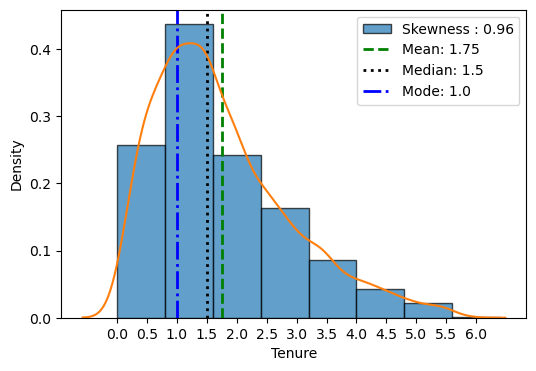

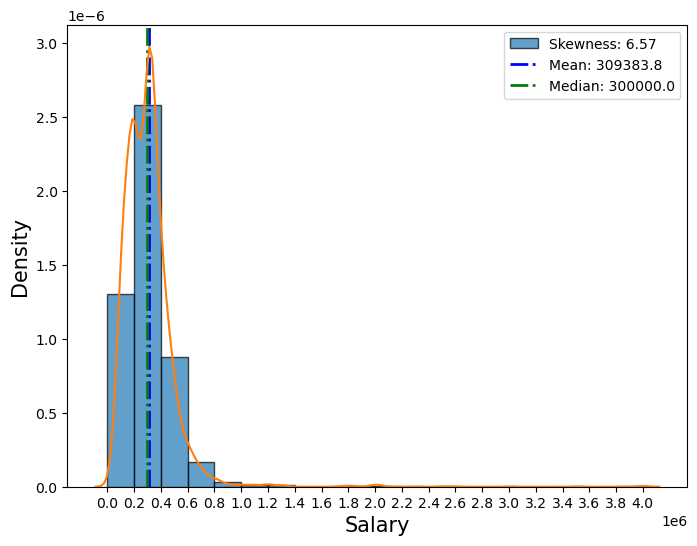

In [54]:
#Tenure

plt.figure(figsize = (6,4))
plt.hist(df['Tenure'],
        ec = 'k',
        bins = np.arange(0, df['Tenure'].max()+0.8, 0.8),
        alpha = 0.7,
        label = f"Skewness : {round(df['Tenure'].skew(),2)}",
        density = True)
plt.xticks(ticks = np.arange(0, df['Tenure'].max()+0.5, 0.5))
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.axvline(df['Tenure'].mean(), label = f"Mean: {round(df['Tenure'].mean(),2)}",
            linestyle = '--',
           color = 'green', linewidth = 2)
plt.axvline(df['Tenure'].median(), label = f"Median: {round(df['Tenure'].median(),2)}",
            linestyle = ':',
           color = 'k', linewidth = 2)
plt.axvline(df['Tenure'].mode()[0], label = f"Mode: {round(df['Tenure'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'blue', linewidth = 2)
sns.kdeplot(df['Tenure'])
plt.legend()
plt.show()

# Salary

bins = np.arange(0, df['Salary'].max() + 200000, 200000)

plt.figure(figsize=(8, 6))

# Plot the histogram
plt.hist(df['Salary'], ec='k', bins=bins, 
         label=f"Skewness: {round(df['Salary'].skew(), 2)}",
         alpha=0.7, density=True)

plt.xticks(bins)
# Plot vertical lines for mean, median, and mode
plt.axvline(df['Salary'].mean(), label=f"Mean: {round(df['Salary'].mean(), 2)}", linestyle='-.', color='blue', linewidth=2)
plt.axvline(df['Salary'].median(), label=f"Median: {round(df['Salary'].median(), 2)}", linestyle='-.', color='green', linewidth=2)


plt.xlabel('Salary', size=15)
plt.ylabel('Density', size=15)
sns.kdeplot(df['Salary'])

plt.legend()

**Observations**

**Tenure**

- The data is positively skewed i.e there exists larger number of respondents with low tenure, 50% data points are below 1.5 years, Average tenure is 1.5 years, The mean, median, and mode lie very close to each other and skewness (0.6) is close to that of a normal (0).

**Salary**

- The data exhibits significant positive skewness, with a skewness value around 6 (approximately), indicating a departure from a normal distribution. The measures of central tendency (mean, median, and mode) are approximately equal.

### 10percentage, 12percentage 

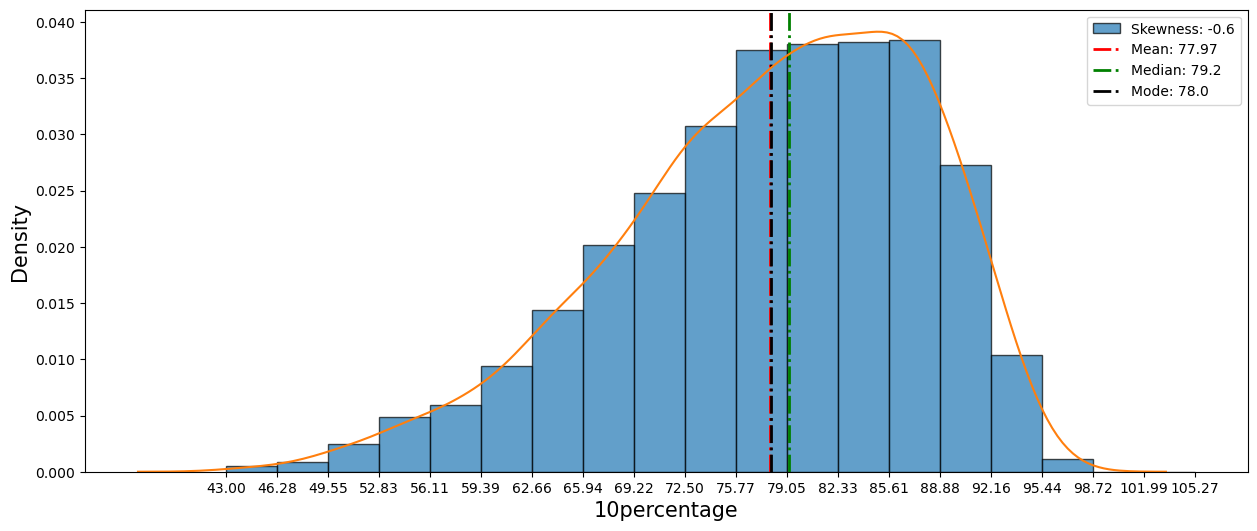

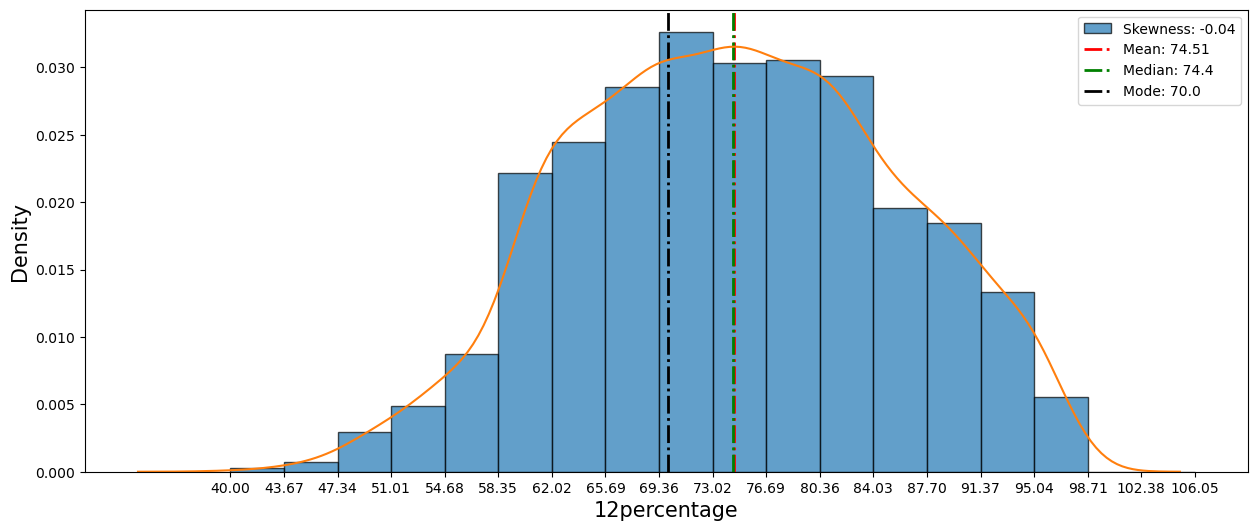

In [55]:

def plot_histogram(df, column_name):
    bins = np.arange(df[column_name].min(), df[column_name].max() + df[column_name].std(),
                     df[column_name].std() / 3)
    plt.figure(figsize=(15, 6))
    plt.hist(df[column_name], ec='k',
             bins=bins,
             label=f"Skewness: {round(df[column_name].skew(), 2)}",
             alpha=0.7,
             density=True)
    plt.xticks(bins)
    plt.xlabel(f'{column_name}', size=15)
    plt.ylabel('Density', size=15)

    plt.axvline(df[column_name].mean(), label=f"Mean: {round(df[column_name].mean(), 2)}",
                linestyle='-.', color='red', linewidth=2)
    plt.axvline(df[column_name].median(), label=f"Median: {round(df[column_name].median(), 2)}",
                linestyle='-.', color='green', linewidth=2)
    plt.axvline(df[column_name].mode()[0], label=f"Mode: {round(df[column_name].mode()[0], 2)}",
                linestyle='-.', color='k', linewidth=2)
    sns.kdeplot(df[column_name])
    plt.legend()
    plt.show()

plot_histogram(df, '10percentage')

plot_histogram(df, '12percentage')


**Observation**

**10percentage**

- The histogram depicts the majority falling within the 75% to 90% range, and a scarcity of students with low percentages. The peak frequency occurs at 78%, and the average score hovers around 77%.


**12percentage**

- The histogram illustrates a scarcity of students with low percentages, with the majority scoring between 69% and 84%. The peak frequency occurs at 70%, and the average score is around 74%.

**Scores column**

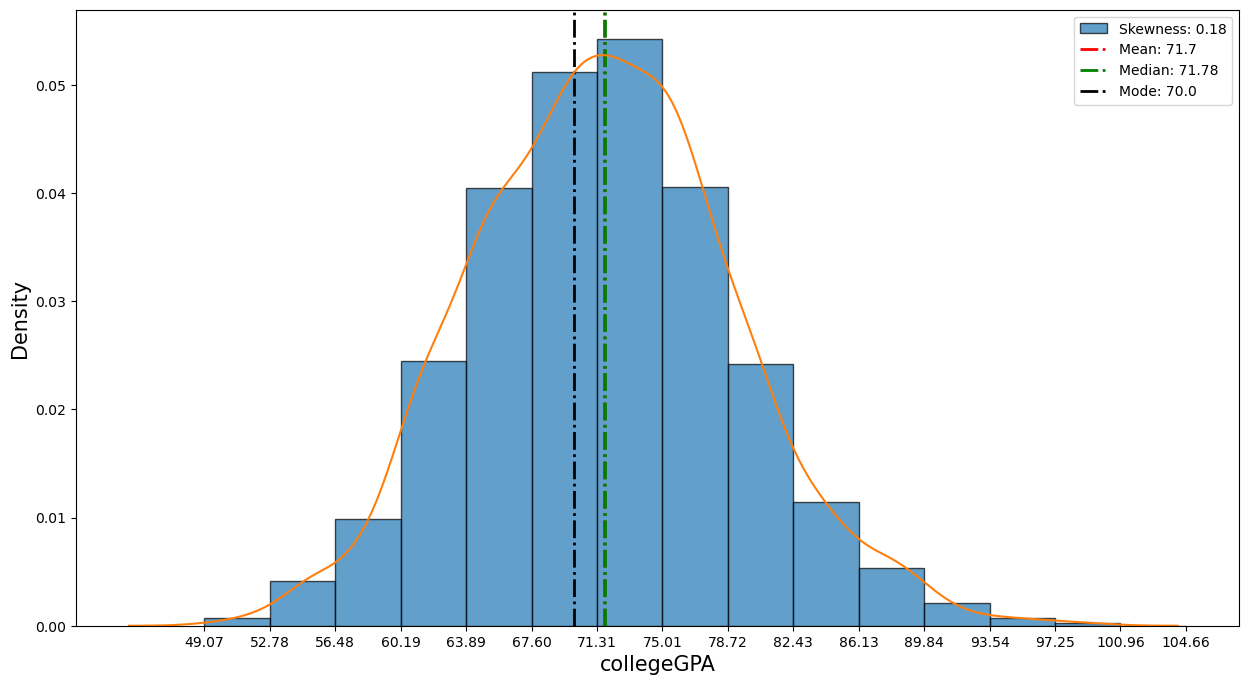

 The majority of students GPAs are ranging between 63% and 78%. The highest frequency of students scored 70%,and the average GPA was 74%


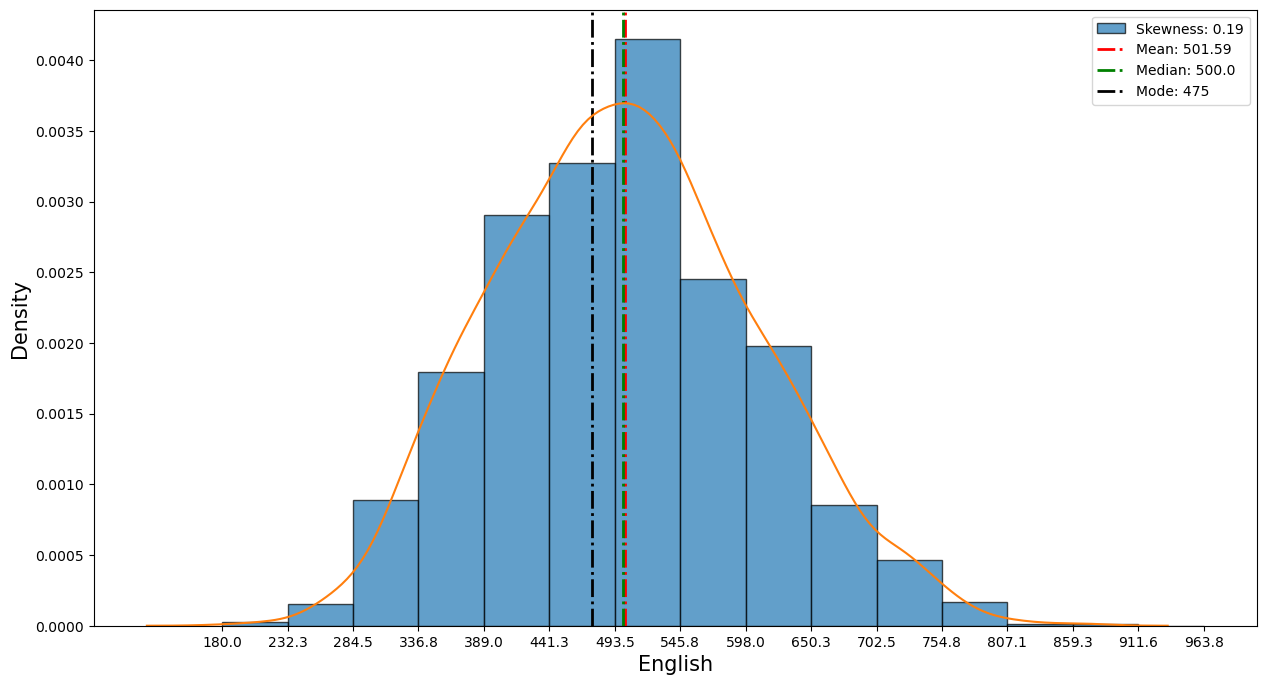

   The bulk of the scores fell within the range of 389 to 545. The peak occurred at 475, with an average score of 502.


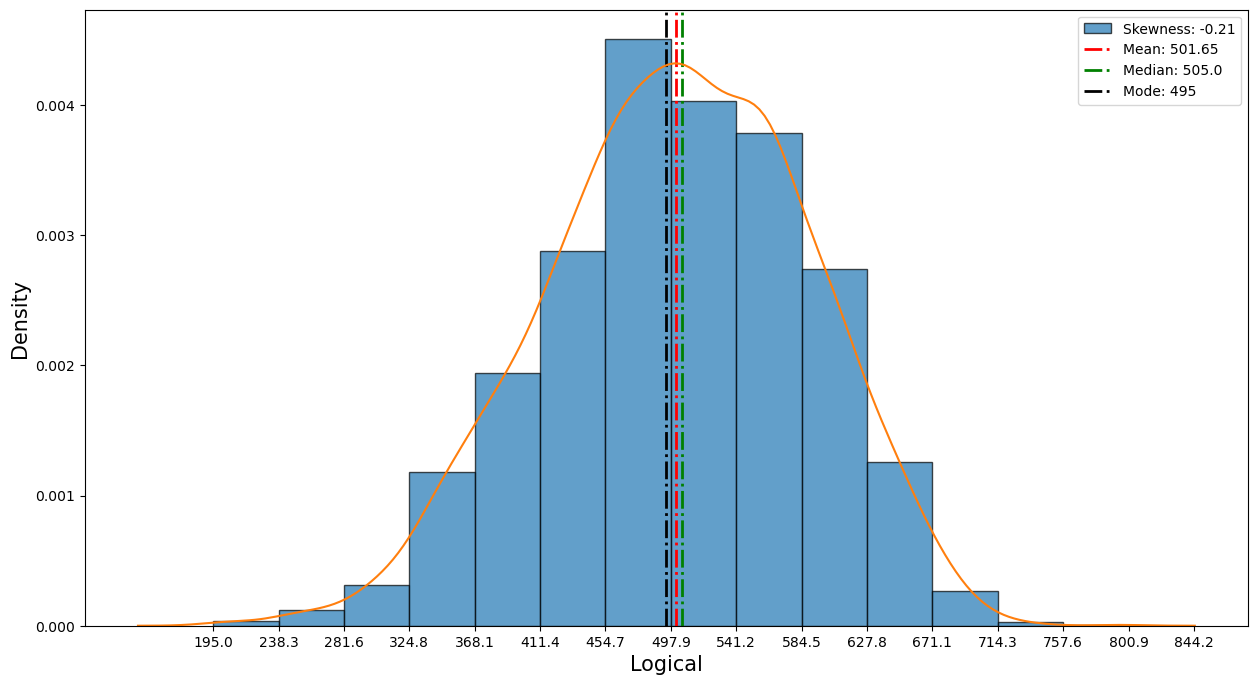

    Most scores fell within the range of 454 to 584, peaking at 495, with an average of 502.


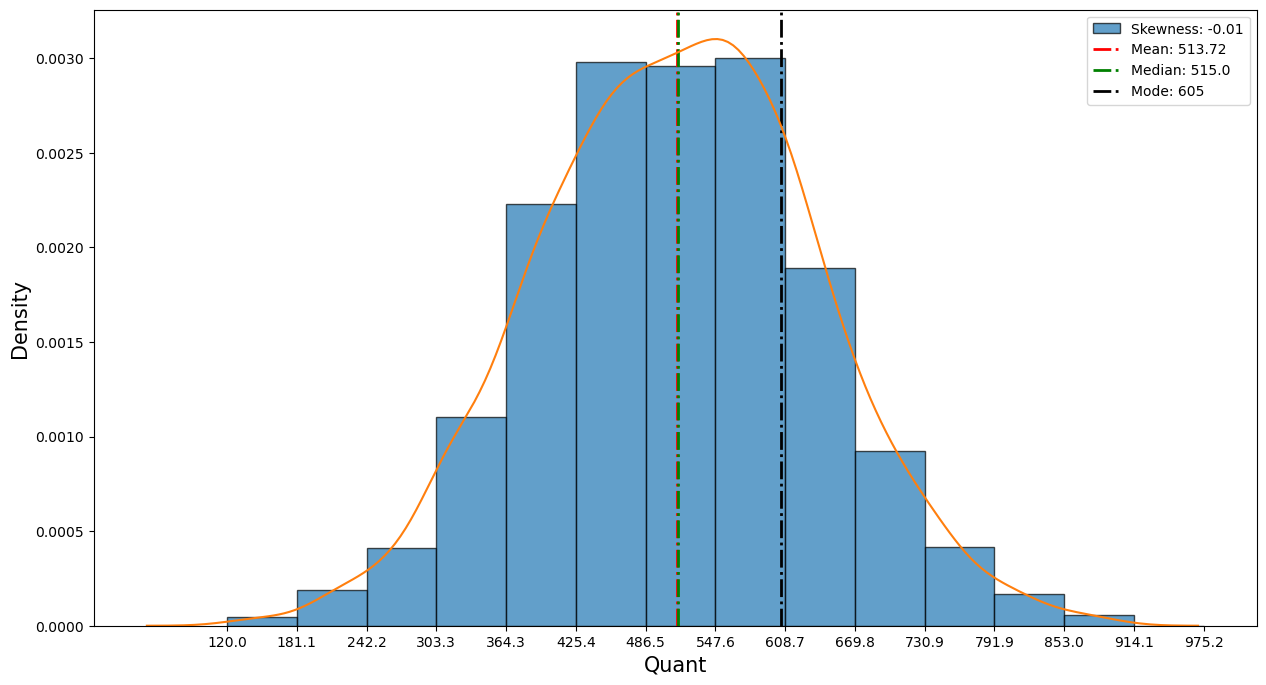

   Majority of the scores were in between 425-608. The maximum number of students scored 605 with an average of 513.


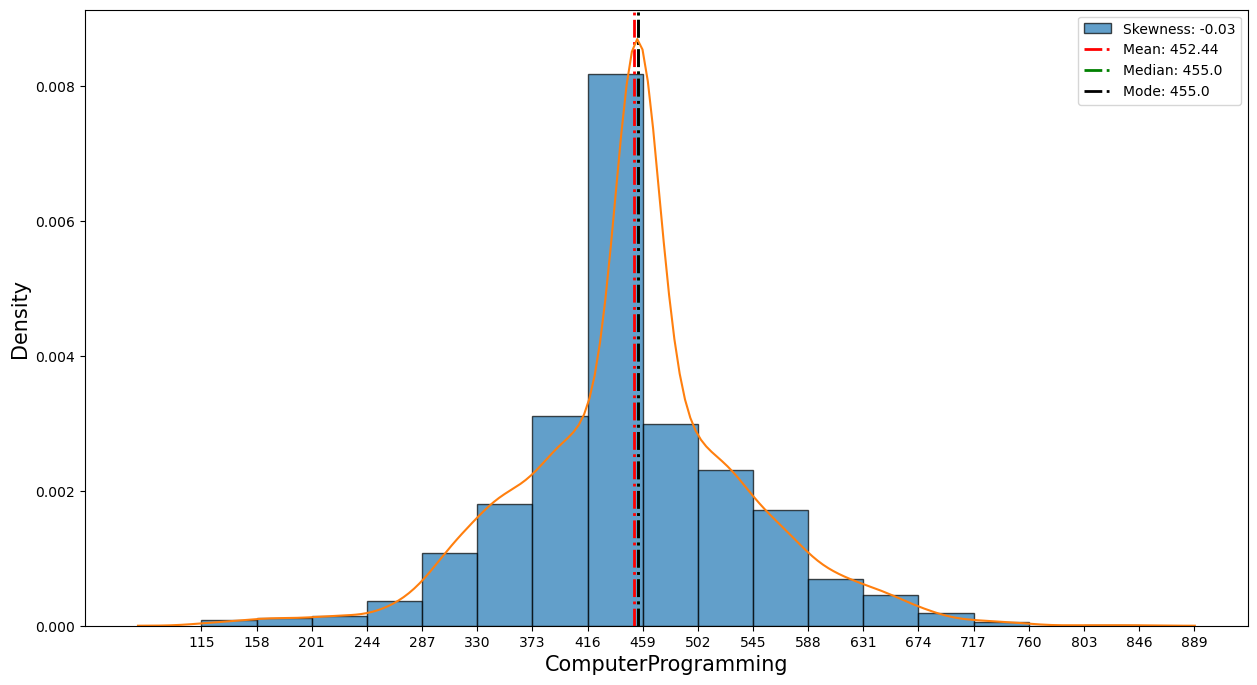

    The majority of scores ranged between 416 and 459. The peak occurred at 455, with an average score of 452. 


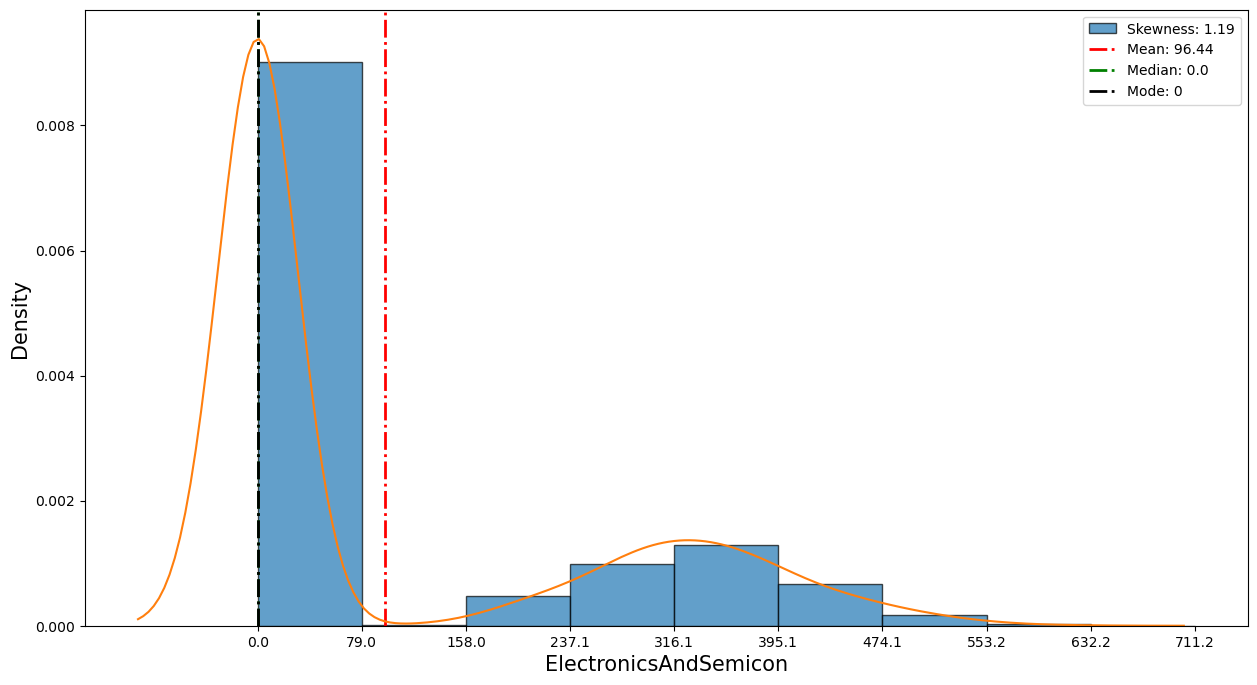

   Most scores fell between 0 and 79. The highest number of students scored 0, with an average score of 96.


In [111]:
def score_histogram(df, column_name):
    bins = np.arange(df[column_name].min(), df[column_name].max() + df[column_name].std(),
                     df[column_name].std() / 2)
    plt.figure(figsize=(15, 8))
    plt.hist(df[column_name], ec='k',
             bins=bins,
             label=f"Skewness: {round(df[column_name].skew(), 2)}",
             alpha=0.7,
             density=True)
    plt.xticks(bins)
    plt.xlabel(f'{column_name}', size=15)
    plt.ylabel('Density', size=15)

    plt.axvline(df[column_name].mean(), label=f"Mean: {round(df[column_name].mean(), 2)}",
                linestyle='-.', color='red', linewidth=2)
    plt.axvline(df[column_name].median(), label=f"Median: {round(df[column_name].median(), 2)}",
                linestyle='-.', color='green', linewidth=2)
    plt.axvline(df[column_name].mode()[0], label=f"Mode: {round(df[column_name].mode()[0], 2)}",
                linestyle='-.', color='k', linewidth=2)
    sns.kdeplot(df[column_name])
    plt.legend()
    plt.show()

score_histogram(df, 'collegeGPA')
print("\033[1m The majority of students GPAs are ranging between 63% and 78%. The highest frequency of students scored 70%,and the average GPA was 74%\033[0m")

score_histogram(df, 'English')
print("\033[1m   The bulk of the scores fell within the range of 389 to 545. The peak occurred at 475, with an average score of 502.\033[0m")

score_histogram(df, 'Logical')
print("\033[1m    Most scores fell within the range of 454 to 584, peaking at 495, with an average of 502.\033[0m")


score_histogram(df, 'Quant')
print("\033[1m   Majority of the scores were in between 425-608. The maximum number of students scored 605 with an average of 513.\033[0m")


score_histogram(df, 'ComputerProgramming')
print("\033[1m    The majority of scores ranged between 416 and 459. The peak occurred at 455, with an average score of 452. \033[0m")


score_histogram(df, 'ElectronicsAndSemicon')
print("\033[1m   Most scores fell between 0 and 79. The highest number of students scored 0, with an average score of 96.\033[0m")


## Box Plot

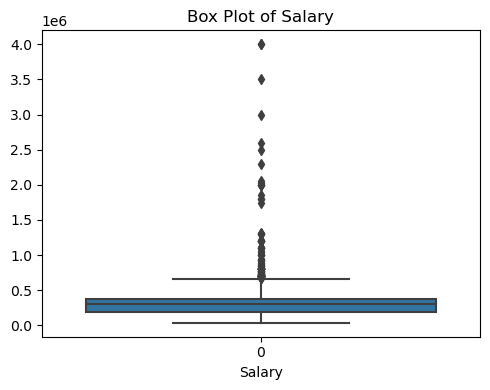

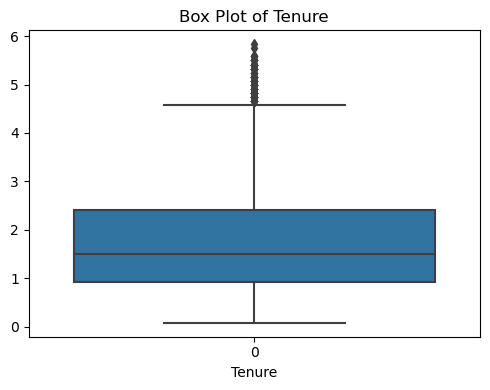

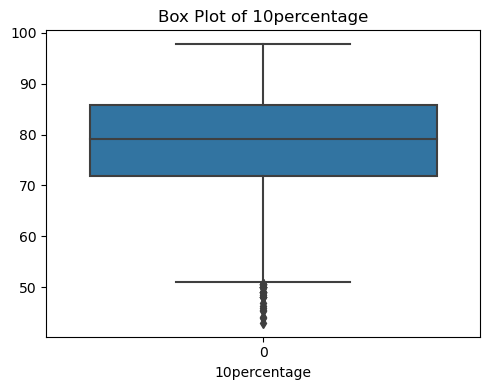

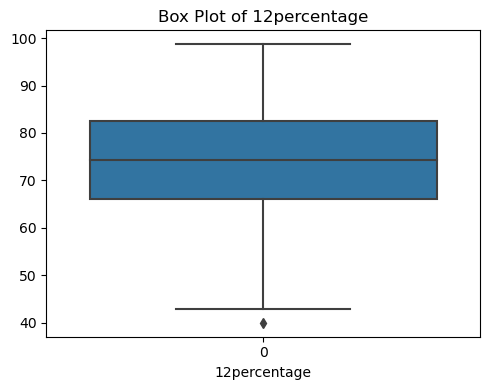

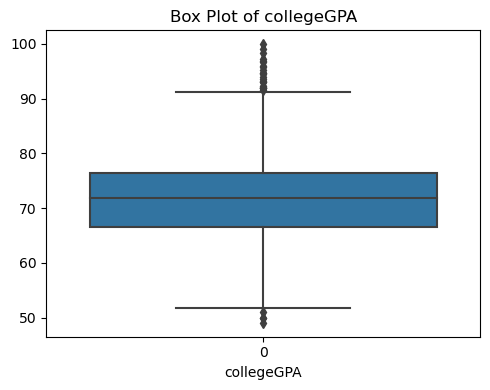

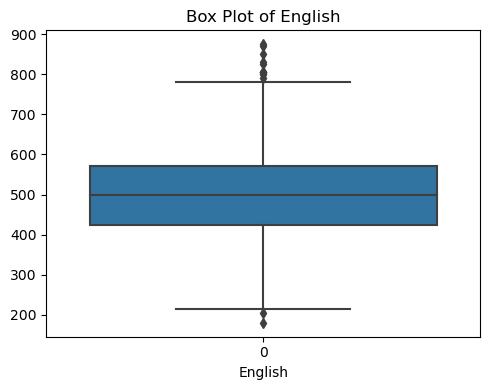

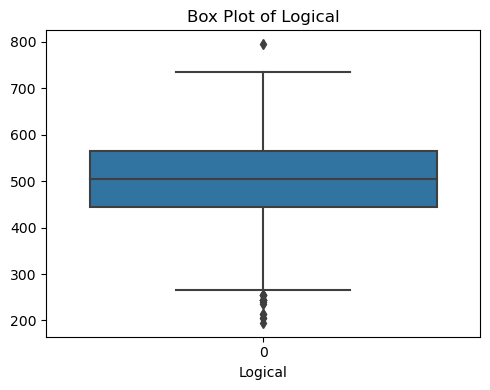

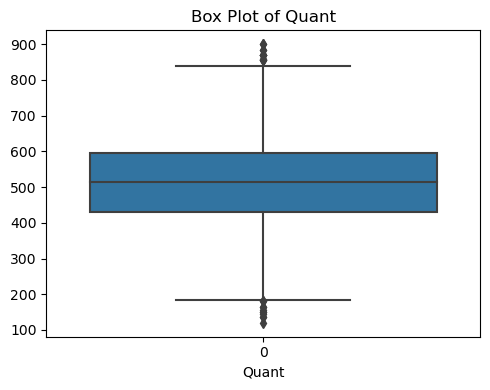

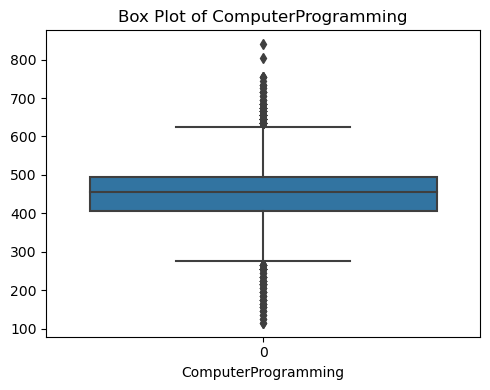

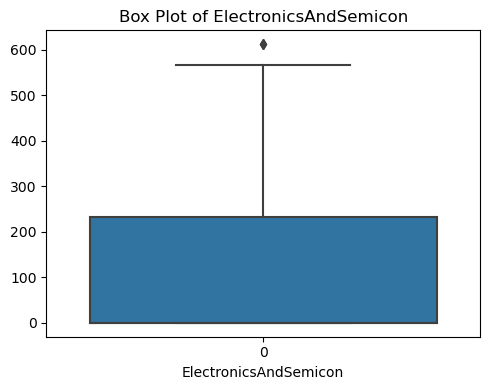

In [61]:

box_column = df[['Salary', 'Tenure', '10percentage', '12percentage', 'collegeGPA', 'English','Logical', 'Quant', 'ComputerProgramming', 'ElectronicsAndSemicon']]

for column in box_column:
    plt.figure(figsize=(5, 4))
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    #plt.xlabel('Values')
    plt.tight_layout()

    plt.show()
    



**Observations**


**Salary**
- There is a notable concentration of data points with high salaries, as depicted by the box plot.

**Tenure**
-  There are few values with large tenure i.e outliers

**10percentage**
- The presence of a few extreme outliers is evident from the box plot.
-
**12percentage**
- The box plot indicates only one data point with an extremely low score

**collegeGPA**
- The box plot reveals the presence of both low and high extreme values within the dataset.

**'English**
- Both lower and higher extreme values are evident from the distribution representation

**Logical**
- Presence of lower extreme values, with only one high extreme value being notable

**Quant**
- The box plot shows the presence of both low and high extreme values.

**ComputerProgramming**
- The box plot illustrates the presence of numerous low extreme values as well as high extreme values.

**ElectronicsAndSemicon**
- The lowest score is equal to the median of the dataset.

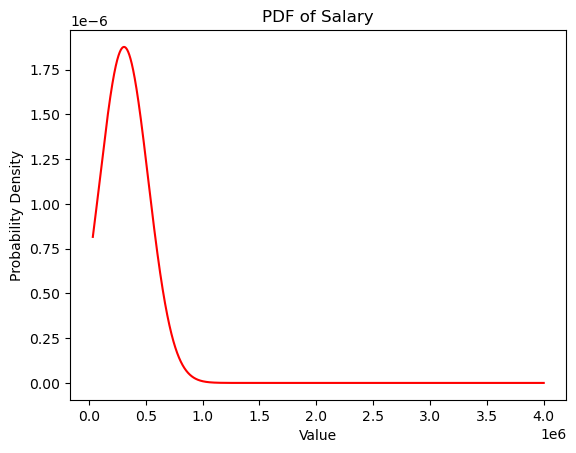

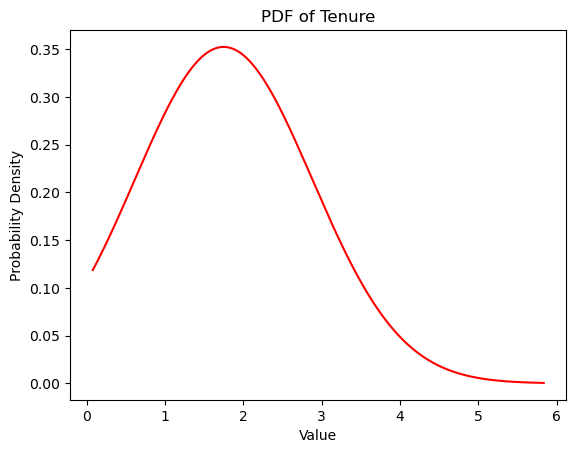

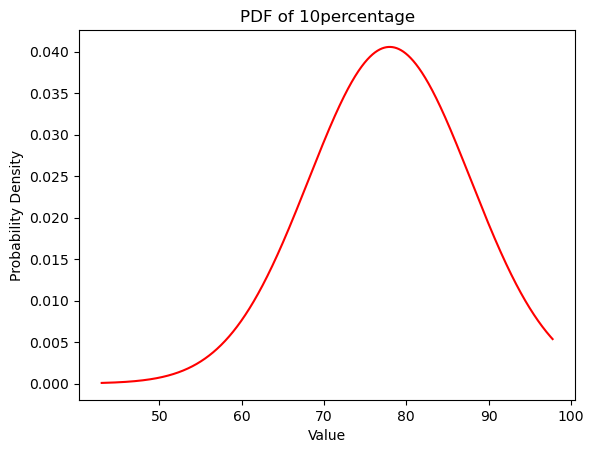

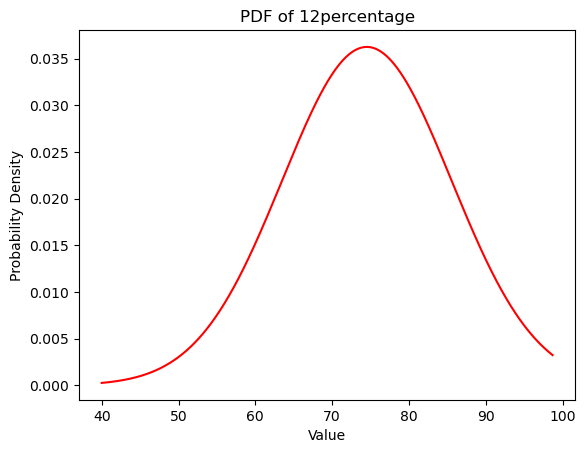

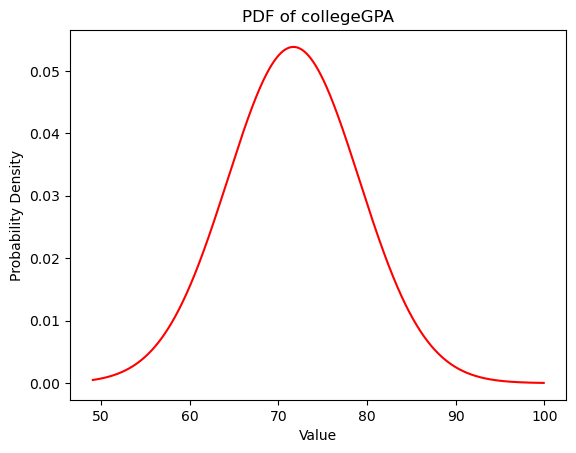

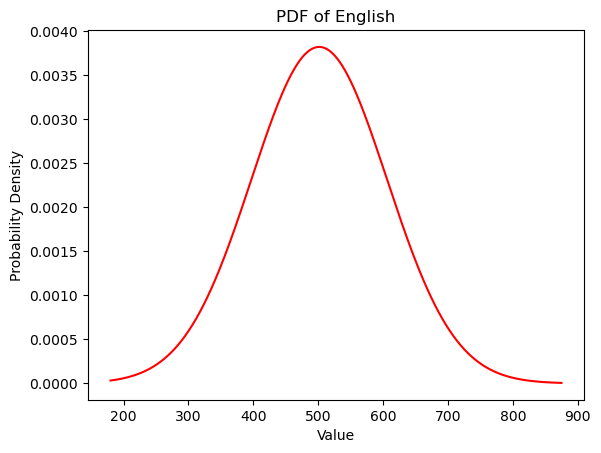

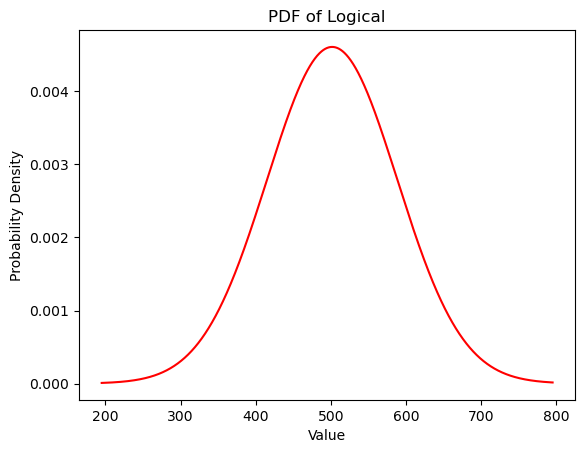

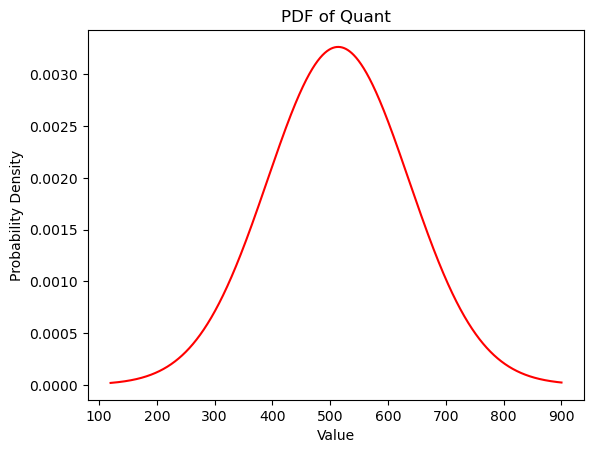

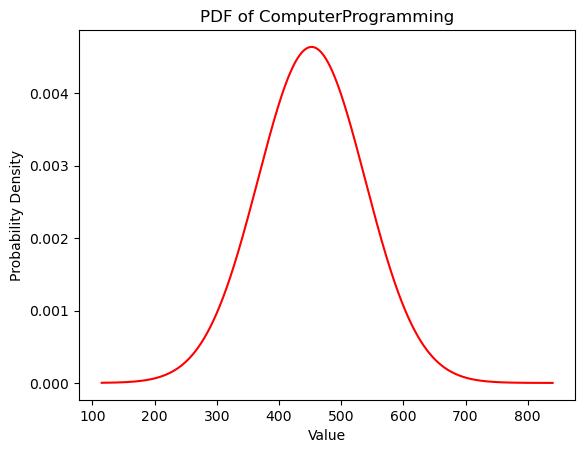

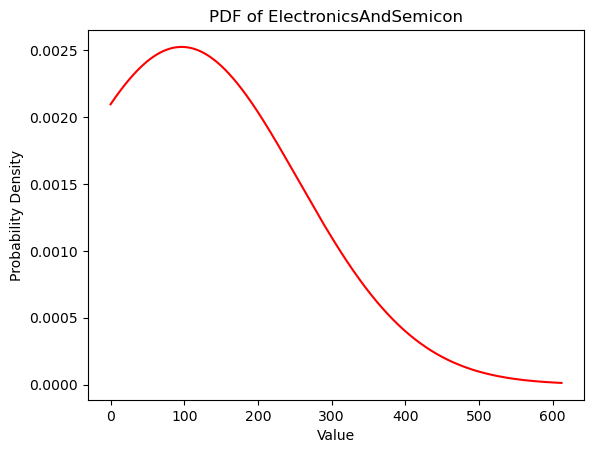

In [62]:
col_data = df[['Salary', 'Tenure', '10percentage', '12percentage', 'collegeGPA', 'English','Logical', 'Quant', 'ComputerProgramming', 'ElectronicsAndSemicon']]

for columns in col_data:
    x_values = np.linspace(df[columns].min(), df[columns].max(), 20000)

    mean_col = df[columns].mean()
    std_col = df[columns].std()

    pdf_values = norm.pdf(x_values, mean_col, std_col)

    plt.plot(x_values, pdf_values, color='red', label= columns)
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {columns}')
    plt.show()

#plt.legend()
    




## Treating Outliers

In [63]:
def outlier_treat(column_data):
    sorted(column_data)
    Q1,Q3 = np.percentile(column_data , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [64]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Tenure'],
      dtype='object')

In [65]:
columns = ['Salary','10percentage','12percentage','English',
          'Logical','Quant','Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
        'Tenure']
df1 = df.copy()

In [66]:
for cols in columns:
    lowerbound, upperbound = outlier_treat(df1[cols])

    df1 = df1.drop(df1[(df1[cols] < lowerbound) | (df1[cols] > upperbound)].index)

In [67]:
print(f'Number of observation with outliers: {df.shape[0]}')
print(f'Number of observations without outliers: {df1.shape[0]}')

Number of observation with outliers: 3864
Number of observations without outliers: 2522


## Bivariate Analysis

### Average Salary for each Gender

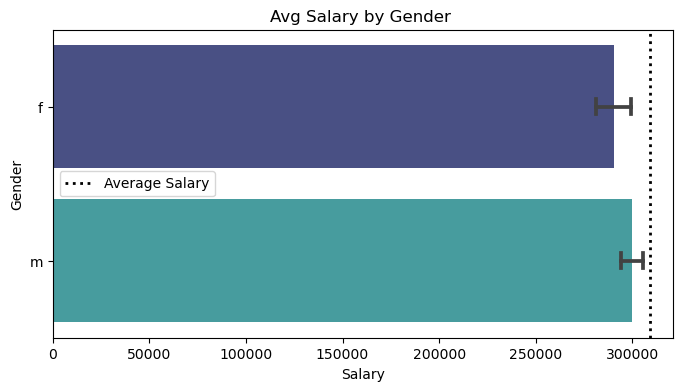

<Figure size 640x480 with 0 Axes>

In [68]:
plt.figure(figsize=(8, 4))

sns.barplot(x='Salary', y='Gender',
            data=df1,
            palette='mako',
            capsize=0.1)

plt.axvline(df['Salary'].mean(), color='k',
            linestyle=':',
            linewidth=2, label='Average Salary')

plt.title('Avg Salary by Gender ')
plt.legend()
plt.xlabel('Salary')

plt.show()




plt.tight_layout()
plt.show()

**Observations**

The average salary for both male and female is approximately equal and it implies that there was no gender bias in terms of salary. It is also plausible to say that Female's get salary below the overall average salary.

### Avg Salary by Designation

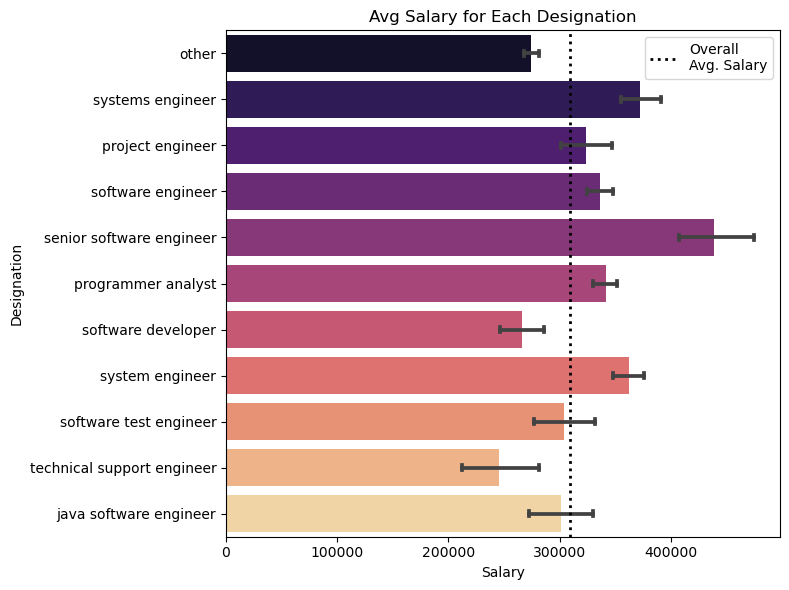

In [69]:
plt.figure(figsize=(8, 6))

sns.barplot(x = 'Salary', y = 'Designation',
           data = df1,
           palette = 'magma',
           capsize = 0.1)
plt.axvline(df['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
plt.title('Avg Salary for Each Designation')
plt.legend()
plt.xlabel('Salary')

plt.tight_layout()
plt.show()

**Observations**

Bar plot shows the maximum salary for each Designation. Senior Software Engineer has the highest salary but they also has the maximum standard deviation in their salary. There are only two designations namely, software developer and technical support engineer who has salary lower than average salary.

## 2. Scatter Plots

#### 2.1 Salary and CollegeGPA score

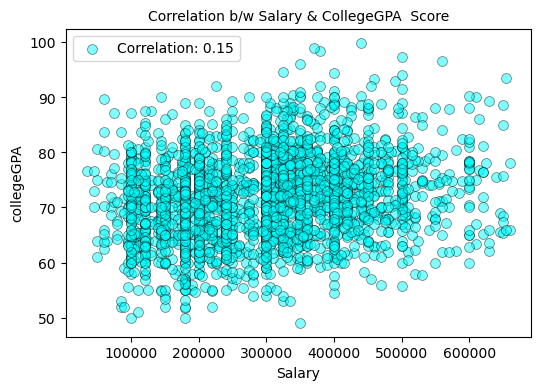

In [70]:
plt.figure(figsize=(6, 4))


sns.scatterplot(x=df1['Salary'],y=df1['collegeGPA'],
               ec = 'k',
               color = 'cyan',
               alpha = 0.5,
               s = 50,
               label = f"Correlation: {round(df[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
plt.title('Correlation b/w Salary & CollegeGPA  Score', size=10)
plt.legend()
plt.show()

#### 2.2 Salary & Tenure


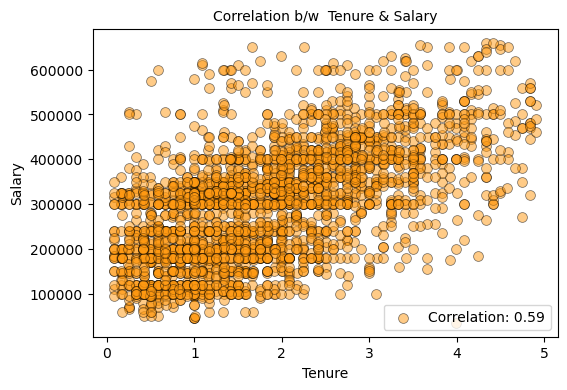

In [71]:

plt.figure(figsize=(6, 4))


sns.scatterplot(x=df1['Tenure'],y=df1['Salary'],
               ec = 'k',
               color = '#ff9911',
               alpha = 0.5,
               s = 50,
               label = f"Correlation: {round(df1[['Tenure','Salary']].corr().iloc[1,0],2)}"
               )
plt.title('Correlation b/w  Tenure & Salary', size=10)
plt.legend()
plt.show()

**Observations**

After removing the outliers, it is evident that salary gets about 50% of increment as tenure increase as there is a positive correlation of 0.60.

## 3. Crosstabs

### 3.1 Gender and Specialization

<Axes: ylabel='Specialization'>

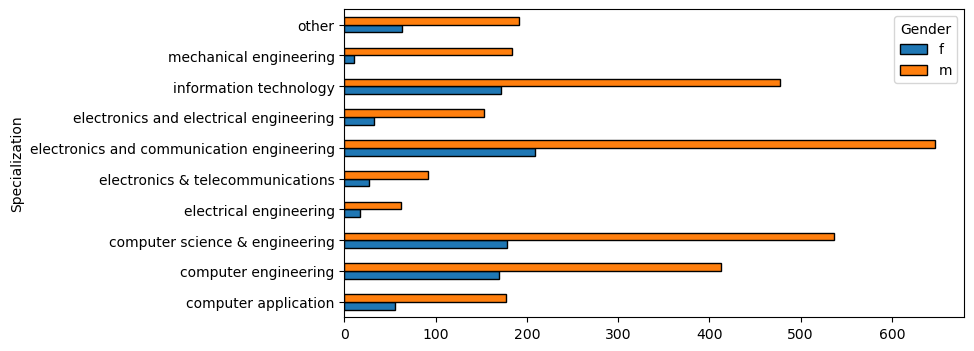

In [72]:
pd.crosstab(df['Gender'],df['Specialization']).T.plot(kind = 'barh',
                                                     ec = 'k',
                                                     figsize = (8,4))

**Observations**

There are almost males 2 times as of females in every specialization. Also, there are very less number of females who opted for mechanical and electronics.

## 4. Pivot Tables

### 4.1 Average Salary by CollegeTier

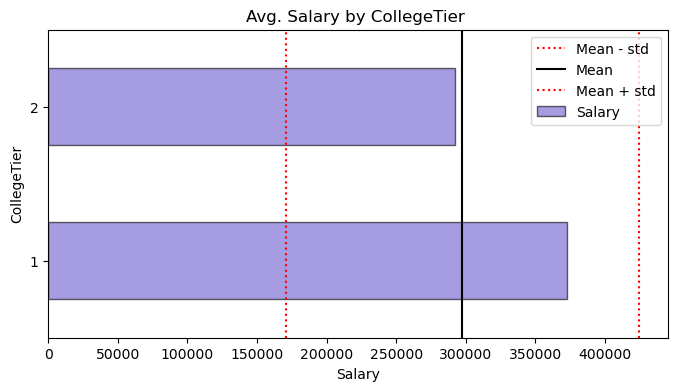

In [73]:
pd.pivot_table(index = 'CollegeTier',
              values = 'Salary',
              data = df1).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'slateblue',
                                  title = 'Avg. Salary by CollegeTier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df1['Salary'].mean() - df1['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df1['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df1['Salary'].mean() + df1['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

**Observations**

College within Tier 1 offers high salary as compared to the colleges in TIer 2. Colleges in Tier 2 offers below overall average salary.

### 4.2 Average Salary by CollegeCityTier

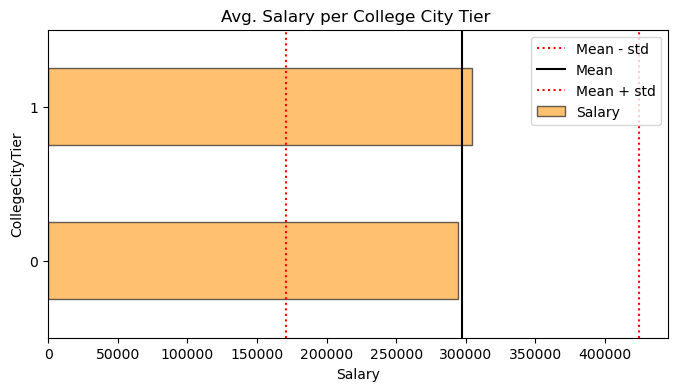

In [74]:
pd.pivot_table(index = 'CollegeCityTier',
              values = 'Salary',
              data = df1).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = '#ff9911',
                                  title = 'Avg. Salary per College City Tier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df1['Salary'].mean() - df1['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df1['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df1['Salary'].mean() + df1['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

**Obervations**

Cities under Tier 1 and 2 offers almost same salaries to students.

## Research Questions


### 1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”

In [76]:
designations = ameo_data['Designation'].value_counts().sort_index()
pd.set_option('display.max_rows', None)

print(designations)

.net developer                             34
.net web developer                          4
account executive                           4
account manager                             1
admin assistant                             2
administrative coordinator                  1
administrative support                      1
aircraft technician                         1
android developer                          46
application developer                      52
application engineer                       22
apprentice                                  3
ase                                         3
asp.net developer                          26
assistant administrator                     1
assistant electrical engineer               2
assistant engineer                          4
assistant manager                          52
assistant professor                        12
assistant programmer                        3
assistant software engineer                 3
assistant store manager           

In [77]:
ameo_data['Designation'] = ameo_data['Designation'].replace([
    'programmer analyst trainee', 'programmer analyst'
], 'programmer analyst'
)

ameo_data['Designation'] = ameo_data['Designation'].replace([
    'software eng', 'software engg', 'software engineer', 'software engineere', 'software enginner'
], 'software engineer'
)

In [78]:
df3 = ameo_data[(ameo_data["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
                (ameo_data["Specialization"].isin(["computer science & engineering", "computer engineering"]))]


C:\Users\DELL\AppData\Local\Temp\ipykernel_21176\2495378655.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


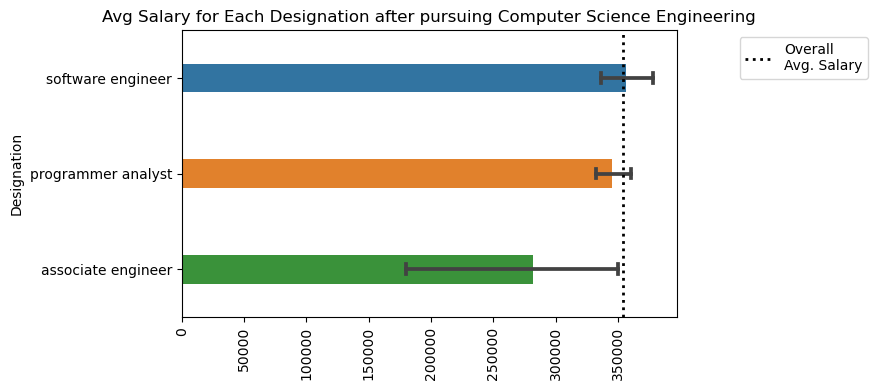

In [79]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='Salary', y='Designation',
            data=df3,
            capsize=0.1,
            width=0.3,
            ax=ax)
ax.axvline(df3['Salary'].mean(), color='k',
           linestyle=':',
           linewidth=2, label='Overall\nAvg. Salary')
ax.set_title('Avg Salary for Each Designation after pursuing Computer Science Engineering')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

**Solution considering all designations in Hypothesis**

In [81]:
import random
n = 40
salary_random = random.sample(df3['Salary'].tolist(),n)
print(salary_random)

[300000.0, 380000.0, 180000.0, 300000.0, 200000.0, 110000.0, 230000.0, 305000.0, 250000.0, 135000.0, 300000.0, 200000.0, 450000.0, 300000.0, 85000.0, 120000.0, 395000.0, 350000.0, 455000.0, 315000.0, 550000.0, 550000.0, 200000.0, 310000.0, 335000.0, 300000.0, 120000.0, 325000.0, 550000.0, 220000.0, 280000.0, 320000.0, 310000.0, 360000.0, 330000.0, 600000.0, 120000.0, 300000.0, 300000.0, 450000.0]


**Function for T-Score**

In [82]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

**Calculating sample values**

In [83]:
from scipy.stats import t,norm
import statistics

print('Sample Mean: ', statistics.mean(salary_random))
print('Sample Standard Deviation: ', statistics.stdev(salary_random))

Sample Mean:  304750.0
Sample Standard Deviation:  127711.36326769169


In [84]:
sample_size = 40
sample_mean = statistics.mean(salary_random)
pop_mean = 275000
sample_std = statistics.stdev(salary_random)

**Calculating t_value**

In [85]:
t_value = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_value)

1.47328723118891


**Calculating t_critical**

In [86]:
confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha/2, df = 99)

print(t_critical)

1.9842169515086827


**One Sample t-test Visualization**

Text(304750.0, 0.7, 'x_bar')

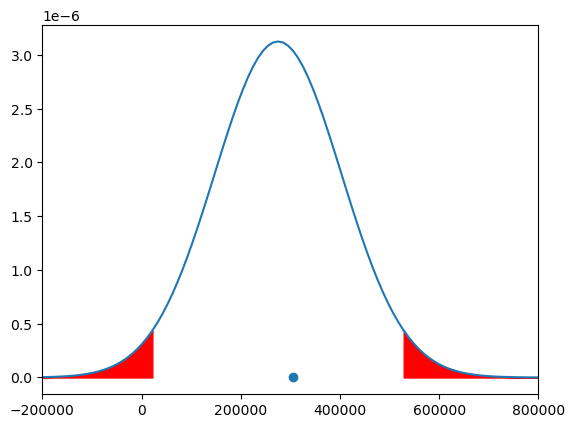

In [87]:
x_min = -200000
x_max = 800000

mean = pop_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.7))

In [88]:
if(t_value < t_critical):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is not enough evidence to reject the Null Hypothesis


In [89]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_value)))

print("p_value = ", p_value)

if(p_value > alpha):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

p_value =  0.14067360223866388
There is not enough evidence to reject the Null Hypothesis


### 2. Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)¶

In [90]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

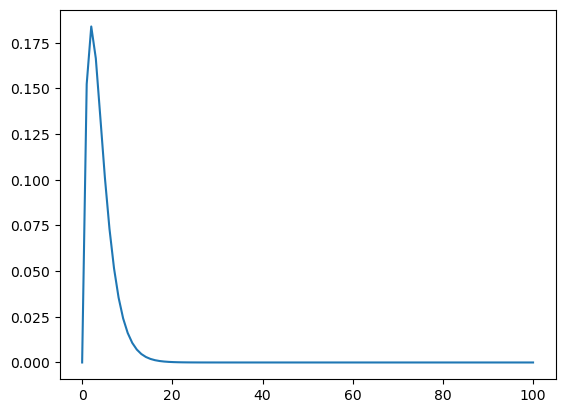

In [91]:
x = np.linspace(0, 100, 100)
y = chi2.pdf(x, df = 4)
plt.plot(x, y)

In [96]:
observ = pd.crosstab(df1.Specialization,df1.Gender)
observ

Gender,f,m
Specialization,,
computer application,38,103
computer engineering,142,300
computer science & engineering,57,162
electrical engineering,13,46
electronics & telecommunications,26,80
electronics and communication engineering,171,512
electronics and electrical engineering,28,117
information technology,115,278
mechanical engineering,10,148


**Computing Chi2 statistics, p_value and dof**

In [98]:
chi2_statistic, chi2_p_value, chi2_dof, chi2_expected = chi2_contingency(obsr)

print("Statistic            :", chi2_statistic)
print('')
print("p value              :", chi2_p_value)
print('')
print("Degrees of freedom   :", chi2_dof)
print('')
print("Expected frequencies array:\n", chi2_expected)

Statistic            : 47.20750369082053

p value              : 3.5903618013378084e-07

Degrees of freedom   : 9

Expected frequencies array:
 [[ 36.11657415 104.88342585]
 [113.21649485 328.78350515]
 [ 56.09595559 162.90404441]
 [ 15.11260904  43.88739096]
 [ 27.15146709  78.84853291]
 [174.94766059 508.05233941]
 [ 37.14115781 107.85884219]
 [100.66534496 292.33465504]
 [ 40.47105472 117.52894528]
 [ 45.08168121 130.91831879]]


**Calculating chi2_critical**

In [100]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, chi2_dof)

chi2_critical

16.918977604620448

**Chi-squared Test Visualization**

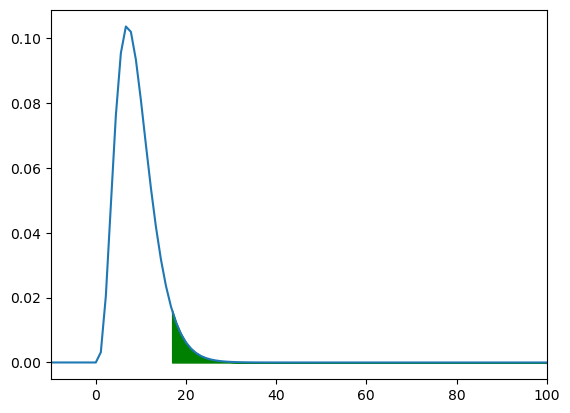

In [101]:
x_min = -10
x_max = 100

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, chi2_dof)
plt.xlim(x_min, x_max)
plt.plot(x, y)

chi2_critical_right = chi2_critical

x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, chi2_dof)
plt.fill_between(x1, y1, color='green')

In [102]:
if(chi2_statistic > chi2_critical):
   print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is not enough evidence to reject the Null Hypothesis


In [103]:
if(chi2_p_value < alpha):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is not enough evidence to reject the Null Hypothesis


### **Observations**
                                        Test          	Value
                                        chi2_critical	16.918977604620448
                                        chi2_statistic	48.62141720904882
                                        chi2_p_value	1.9542895953348e-07

- As the result of the second research question we see that there is a relationship between Gender and specialization.
- We test this claim through Chi-Square test and find the result that both the categorical variables are dependent on each other.
- Some specialization or working field does not allow some candidates to work in that field due to some risks.

### Conclusion

**1. Data Insights**

 - The dataset encompasses the employment outcomes of engineering graduates, focusing on target variable *Salary*.
 - it includes standardized scores in  distinct areas: *cognitive skills, technical skills, and personality skills.*

2. **Data Manipulation:**

    - Upon the observation, the dataset consists of 4000 rows and 40 columns.
    - The dataset exhibits numerous duplicate values, necessitating data manipulation.
    - Subsequently, we assess for the presence of any missing values (NaN).
    - Following data cleaning, we proceed with visualization.

3. **Data Visualization:**

    - **Univariate Analysis:**

        - Univariate analysis encompasses various plots, including Cumulativee Distribution Functions (CDF), Histograms, Box Plots, and Summary Plots.
        - These visualizations illustrate probability and frequency distributions.

    - **Bivariate Analysis:**
        
        - Bivariate analysis are comprising of Scatterplots, Barplots, Crosstabs, Pivot tables, pie charts.
        - This analysis helps in comparing percentages across different variables.
        - identifying outliers, as observed through Boxplots.
        - For instance, Countplots assist in identifying outliers within categorical variables, such as Job City, by highlighting the cities with higher employee counts.